In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import datetime
import time
import matplotlib as mpl 
import seaborn as sns
import pyecharts
import PIL.Image as image
import matplotlib.ticker as mtick  
from pyecharts import Bar
from matplotlib.font_manager import FontProperties
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
# 导入数据
df_train = pd.read_csv('data/train_users_2.csv')
sessions = pd.read_csv('data/sessions.csv')
usergrp = pd.read_csv('data/age_gender_bkts.csv')
countries = pd.read_csv('data/countries.csv')

# 数据预处理

In [3]:
df_train.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


缺失值：    
     1. date_first_booking   
     2. age   
     3. first_affiliate_tracked   

# 用户画像

## 年龄
年龄的最大值是2014，很明显不符合实际，把年龄大于100岁的数据定义为NaN

In [5]:
df_train.age = df_train.age.apply(lambda x: np.nan if x > 100 else x)
df_train.age.describe()

count    123116.00000
mean         36.54434
std          11.70834
min           1.00000
25%          28.00000
50%          34.00000
75%          42.00000
max         100.00000
Name: age, dtype: float64

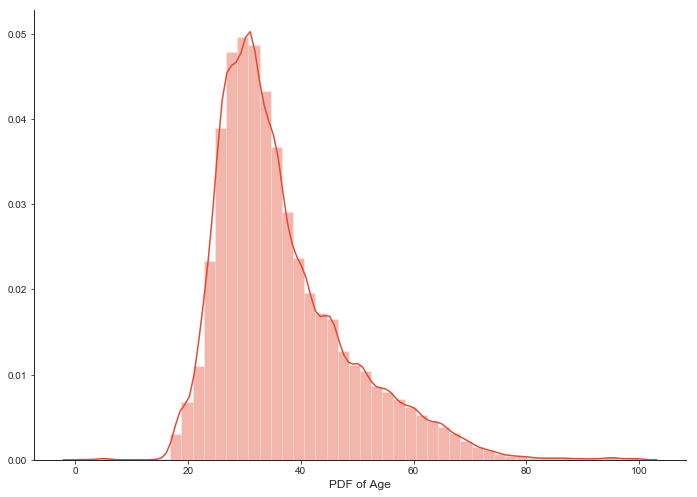

In [6]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(df_train["age"].dropna())
plt.xlabel('PDF of Age')
sns.despine()

In [7]:
#设置切分区域
listBins = [0, 15, 25, 35, 45, 55, 65, 75, 1000]

#设置切分后对应标签
listLabels = ['<15','15-25','25-35','35-45','45-55','55-65','65-75','>75']

#利用pd.cut进行数据离散化切分
df_train['分组'] = pd.cut(df_train["age"], bins=listBins, labels=listLabels, include_lowest=True)

In [8]:
df_train['分组'].value_counts(sort=False)   # sort=False 使用后不会进行排序

<15         65
15-25    15229
25-35    56095
35-45    28048
45-55    13383
55-65     7104
65-75     2480
>75        712
Name: 分组, dtype: int64

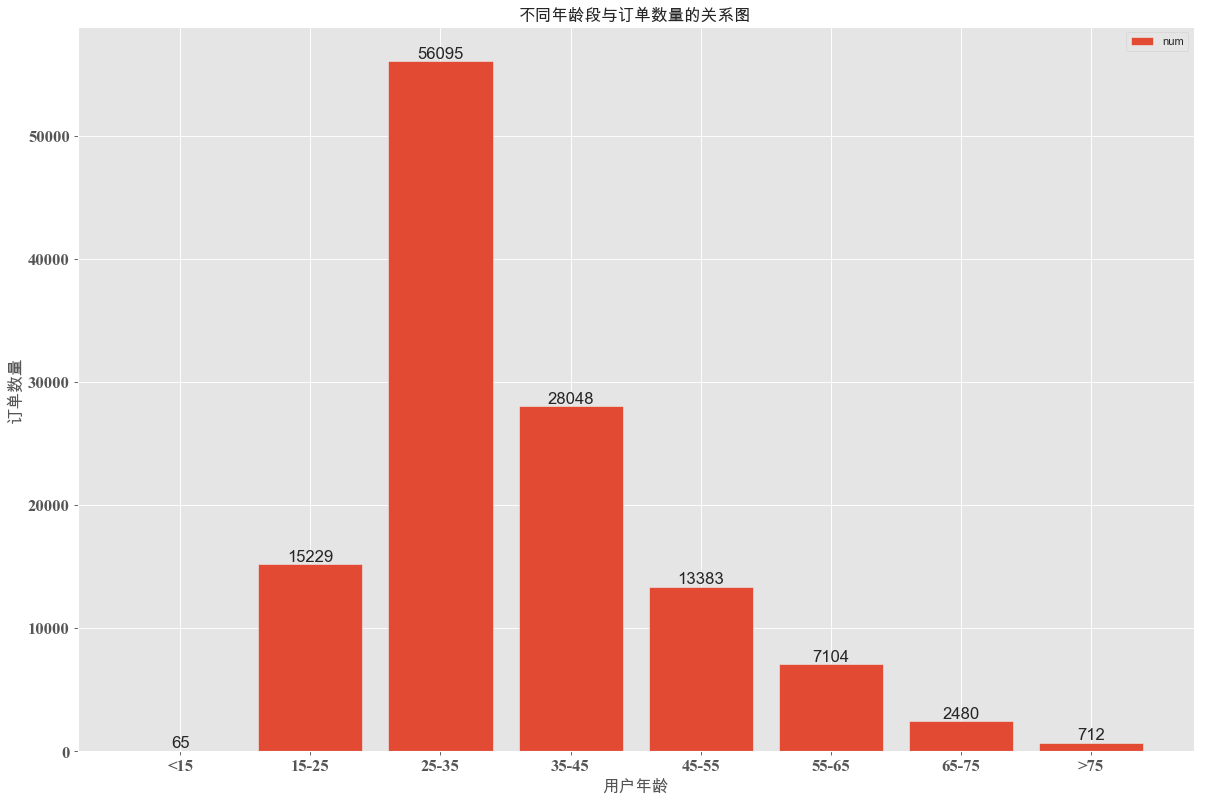

In [12]:
plt.figure(figsize=(18, 12), dpi=80)
x = df_train['分组'].value_counts(sort=False).index
y = df_train['分组'].value_counts(sort=False).values
p = plt.bar(x, y, label="num")
for x,y in zip(x, y):
    plt.text(x,y, '%.0f'%y, ha='center',va='bottom',size =15)
plt.xlabel('用户年龄',size = 15)
plt.xticks(fontproperties = 'Times New Roman',size =15)
plt.ylabel('订单数量',size = 15)
plt.yticks(fontproperties = 'Times New Roman', size = 15)
plt.title('不同年龄段与订单数量的关系图' ,size = 15)
plt.legend(loc="upper right")
plt.show()

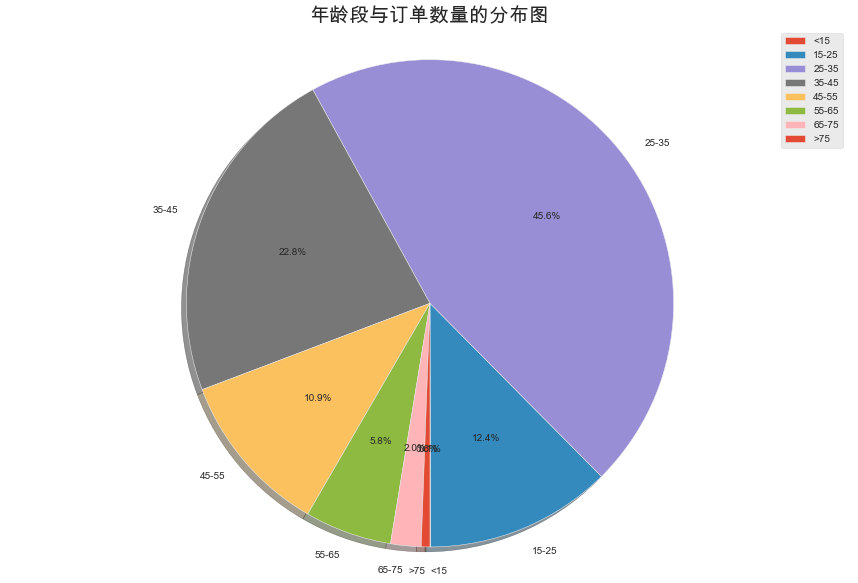

In [13]:
plt.figure(figsize=(15,10))
labels = df_train['分组'].value_counts(sort=False).index
#每个标签占多大，会自动去算百分比
sizes = df_train['分组'].value_counts(sort=False).values
# explode = (0.05,0,0)
patches,l_text,p_text = plt.pie(sizes,
#                                 explode=explode,
                                labels=labels,
                                labeldistance = 1.1,
                                autopct = '%3.1f%%',
                                shadow = True,
                                startangle = 270,
                                pctdistance = 0.6)

for t in l_text:
    t.set_size(10)
for t in p_text:
    t.set_size(10)
plt.axis('equal')
plt.title('年龄段与订单数量的分布图',size=20)
plt.legend()
plt.show()

用户的年龄集中在25-45岁的中青年群体，占比为68.4%，说明这个年龄段的用户具有消费能力和旅行的意愿。

## . 性别

In [260]:
df_train["gender"].unique()

array(['-unknown-', 'MALE', 'FEMALE', 'OTHER'], dtype=object)

In [261]:
df_gender = df_train["gender"].value_counts()
df_gender

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

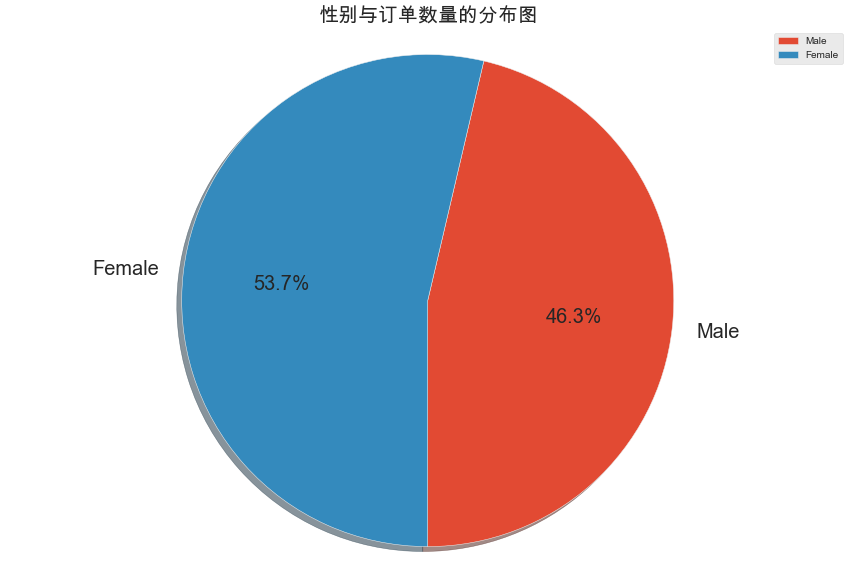

In [262]:
plt.figure(figsize=(15,10))
labels = ['Male',"Female"]
sizes = [54440,63041]
# explode = (0.05,0,0)
patches,l_text,p_text = plt.pie(sizes,
#                                 explode=explode,
                                labels=labels,
                                labeldistance = 1.1,
                                autopct = '%3.1f%%',
                                shadow = True,
                                startangle = 270,
                                pctdistance = 0.6)

for t in l_text:
    t.set_size(20)
for t in p_text:
    t.set_size(20)
plt.axis('equal')
plt.title('性别与订单数量的分布图',size=20)
plt.legend()
plt.show()

## . 用户地区

以language作为划分用户地区的依据

In [17]:
df_train["language"].unique()

array(['en', 'fr', 'de', 'es', 'it', 'pt', 'zh', 'ko', 'ja', 'ru', 'pl',
       'el', 'sv', 'nl', 'hu', 'da', 'id', 'fi', 'no', 'tr', 'th', 'cs',
       'hr', 'ca', 'is'], dtype=object)

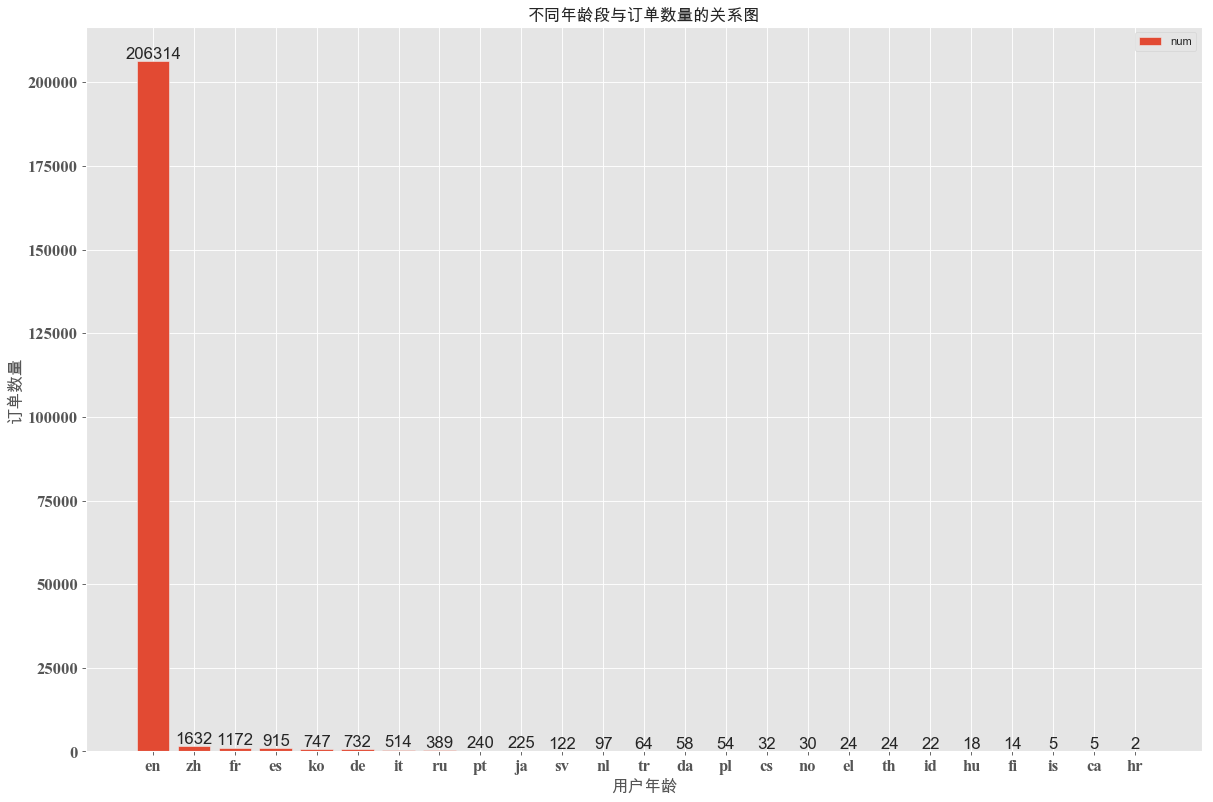

In [18]:
plt.figure(figsize=(18, 12), dpi=80)
x = df_train['language'].value_counts().index
y = df_train['language'].value_counts().values
p = plt.bar(x, y, label="num")
for x,y in zip(x, y):
    plt.text(x,y, '%.0f'%y, ha='center',va='bottom',size =15)
plt.xlabel('用户年龄',size = 15)
plt.xticks(fontproperties = 'Times New Roman',size =15)
plt.ylabel('订单数量',size = 15)
plt.yticks(fontproperties = 'Times New Roman', size = 15)
plt.title('不同年龄段与订单数量的关系图' ,size = 15)
plt.legend(loc="upper right")
plt.show()

## . 目的地

In [263]:
df_train["country_destination"].value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

In [265]:
df_train["country_destination"].value_counts().index[1:]

Index(['US', 'other', 'FR', 'IT', 'GB', 'ES', 'CA', 'DE', 'NL', 'AU', 'PT'], dtype='object')

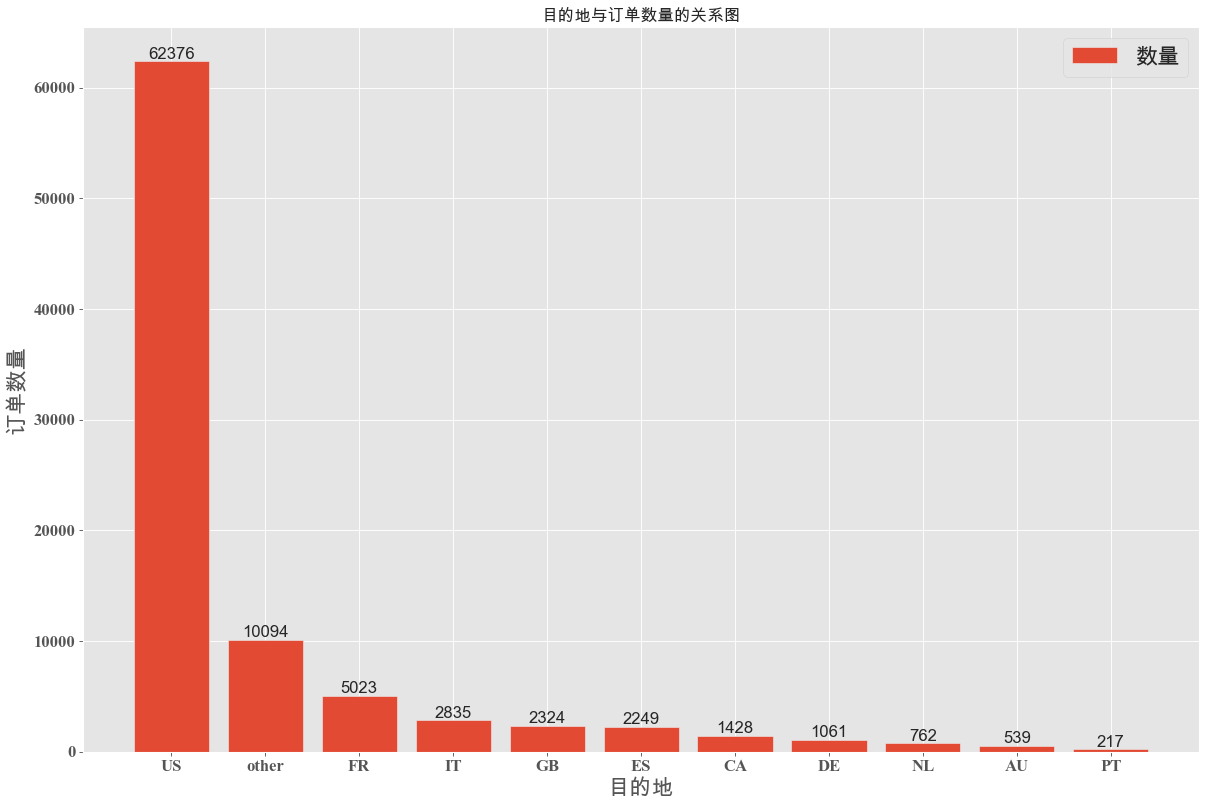

In [266]:
plt.figure(figsize=(18, 12), dpi=80)
x = df_train["country_destination"].value_counts().index[1:]
y = df_train["country_destination"].value_counts().values[1:]
p = plt.bar(x, y, label="数量")
for x,y in zip(x, y):
    plt.text(x,y, '%.0f'%y, ha='center',va='bottom',size =15)
plt.xlabel('目的地',size = 20)
plt.xticks(fontproperties = 'Times New Roman',size =15)
plt.ylabel('订单数量',size = 20)
plt.yticks(fontproperties = 'Times New Roman', size = 15)
plt.title('目的地与订单数量的关系图' ,size = 15)
plt.legend(loc="upper right",prop = {'size':20})
plt.show()

In [21]:
from pyecharts import Map,Geo

In [31]:
value = [62376, 5023,2835,2324,2249,1428,1061,762,539,217]
attr= ["United States", "France", "Italy", "United Kingdom", "Spain", "Canada", "Germany","Netherlands","Australia","Portugal"]

map0 = Map("世界地图示例", width=1000, height=700)
map0.add("世界地图", attr, value, maptype="world", is_visualmap=True, visual_text_color='#000')
map0.render(path="世界地图.html")

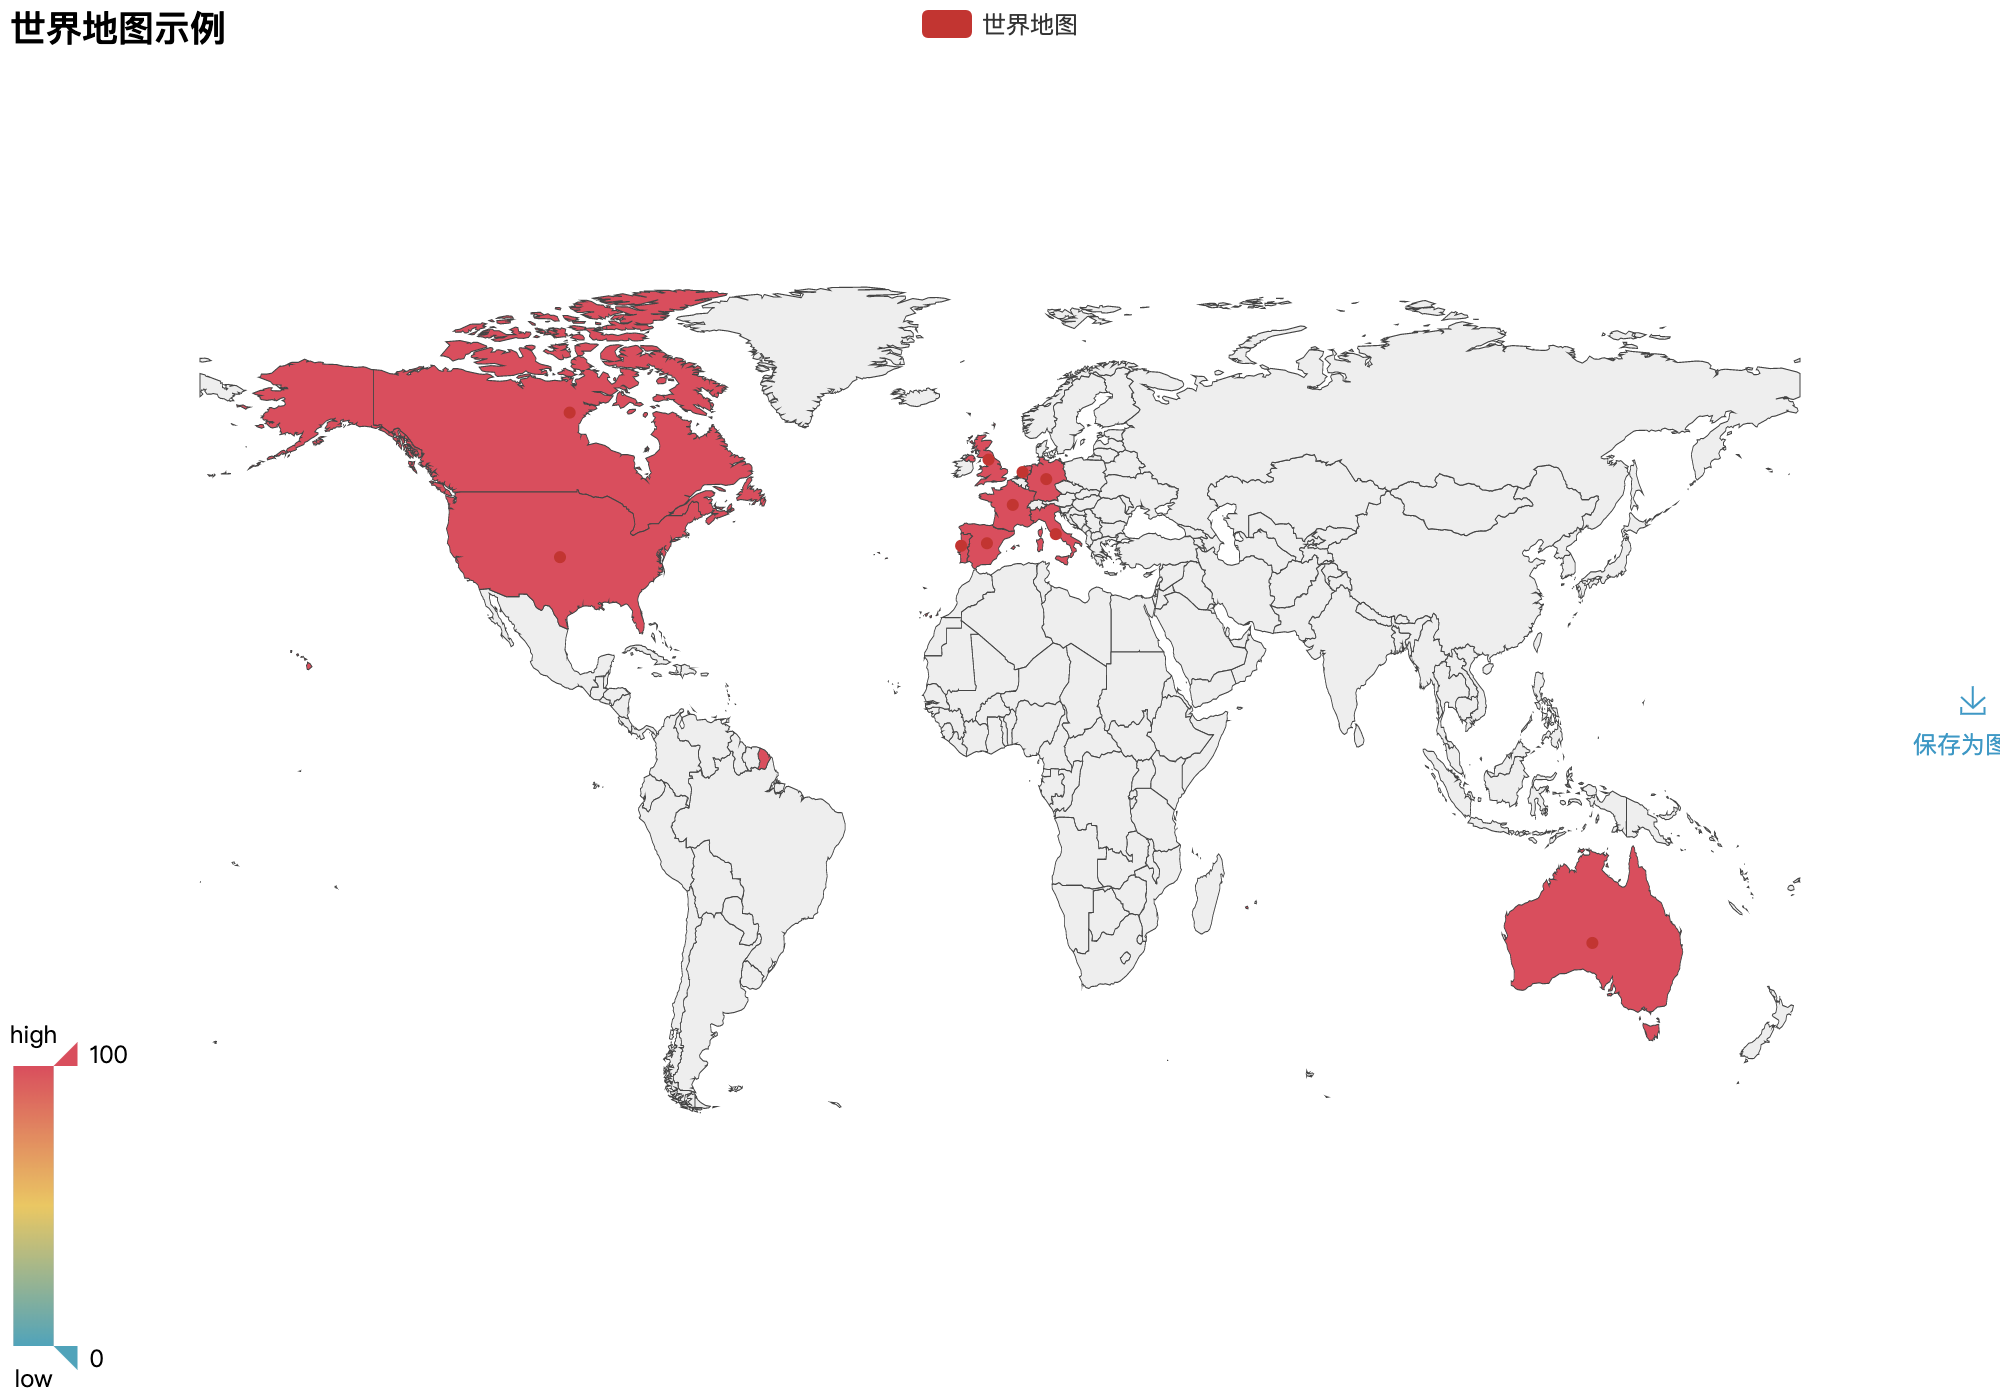

# 推广渠道分析

## 每月新增用户

分析每月新增用户，方法是统计每个月注册用户的数量，将字段‘date_account_created’转化为%Y-%M的形式

In [32]:
df_train["date_account_created"].head()

0    2010-06-28
1    2011-05-25
2    2010-09-28
3    2011-12-05
4    2010-09-14
Name: date_account_created, dtype: object

In [33]:
# 处理时间
data_date = pd.to_datetime(df_train["date_account_created"], format= "%Y-%m-%d")
data_month = data_date.values.astype("datetime64[M]")
# data_month = data["购买日期"].astype(str).str[4:6]
df_train["购买日期"] = data_date
df_train["月份"] = data_month
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,分组,购买日期,月份
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN,2010-06-28,2010-06-01
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,35-45,2011-05-25,2011-05-01
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,55-65,2010-09-28,2010-09-01
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,35-45,2011-12-05,2011-12-01
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,35-45,2010-09-14,2010-09-01


In [37]:
data_pivot = df_train.pivot_table(index="月份", 
                              values=["date_account_created"],
                              aggfunc={
                                  "date_account_created":"count"
                              })
data_pivot.head()

,date_account_created
月份,
2010-01-01,61
2010-02-01,102
2010-03-01,163
2010-04-01,157
2010-05-01,227


In [38]:
data_pivot.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01',
               '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01'],
              dtype='datetime64[n

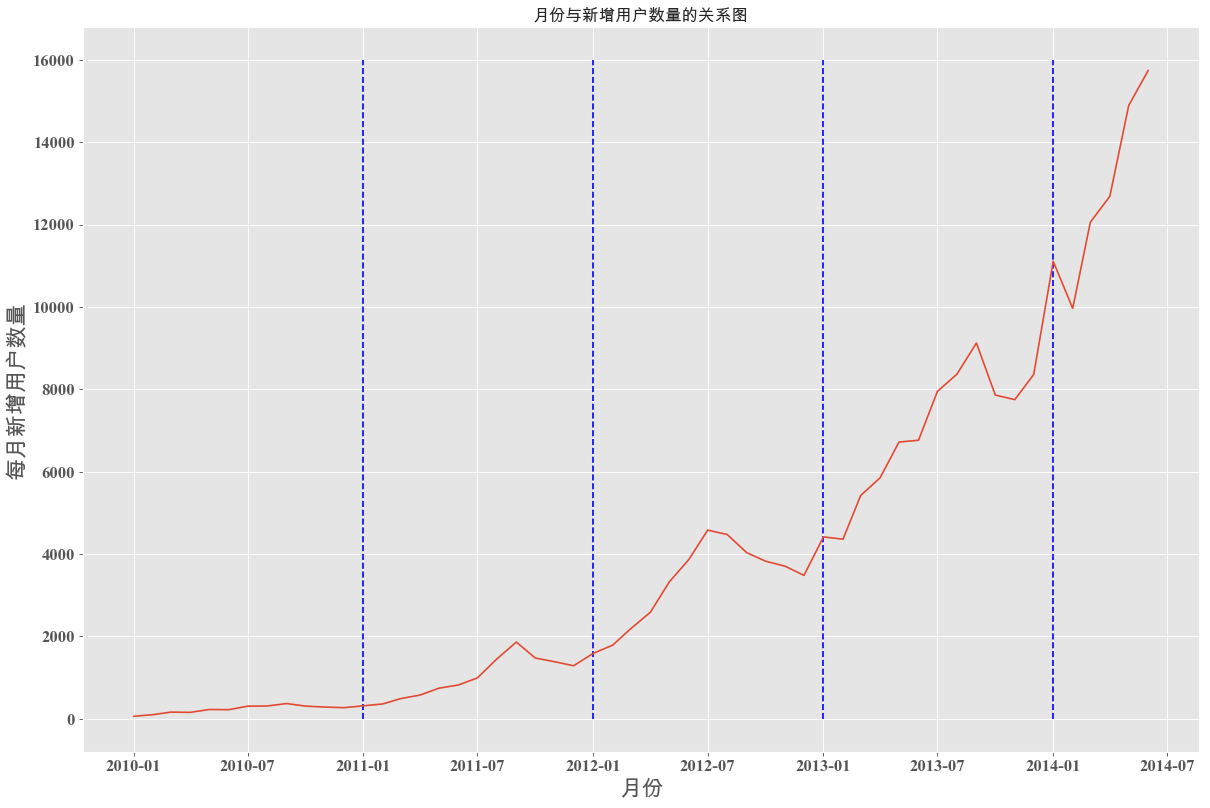

In [41]:
plt.figure(figsize=(18, 12), dpi=80)
plt.plot(data_pivot["date_account_created"])
plt.vlines("2011-01", 0, 16000, colors = "b",linestyles="--")
plt.vlines("2012-01", 0, 16000, colors = "b",linestyles="--")
plt.vlines("2013-01", 0, 16000, colors = "b",linestyles="--")
plt.vlines("2014-01", 0, 16000, colors = "b",linestyles="--")
plt.xlabel('月份',size = 20)
plt.xticks(fontproperties = 'Times New Roman',size =15)
plt.ylabel('每月新增用户数量',size = 20)
plt.yticks(fontproperties = 'Times New Roman', size = 15)
plt.title('月份与新增用户数量的关系图' ,size = 15)
plt.show()

从结果可以看到：    
1. 以年度为单位观察，2010年用户增长较缓慢，原因是公司可能是在成立初期，没有打开市场，知名度小，到后期开始增长，并且增长速率每年递增。   
2. 2011年中开始快速增长，公司发展进入快车道。   
3. 观察发现，每年的7~9月有一个增长高峰，推测可能是夏季为北半球旅游旺季，而且大多数学校都会在这个时间段放假。

##  不同用户端的注册量

In [49]:
df_train["first_device_type"].value_counts()

Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64

In [50]:
df_train["first_device_type"].value_counts(normalize=True)

Mac Desktop           0.419768
Windows Desktop       0.340668
iPhone                0.097254
iPad                  0.067177
Other/Unknown         0.049974
Android Phone         0.013132
Android Tablet        0.006053
Desktop (Other)       0.005617
SmartPhone (Other)    0.000356
Name: first_device_type, dtype: float64

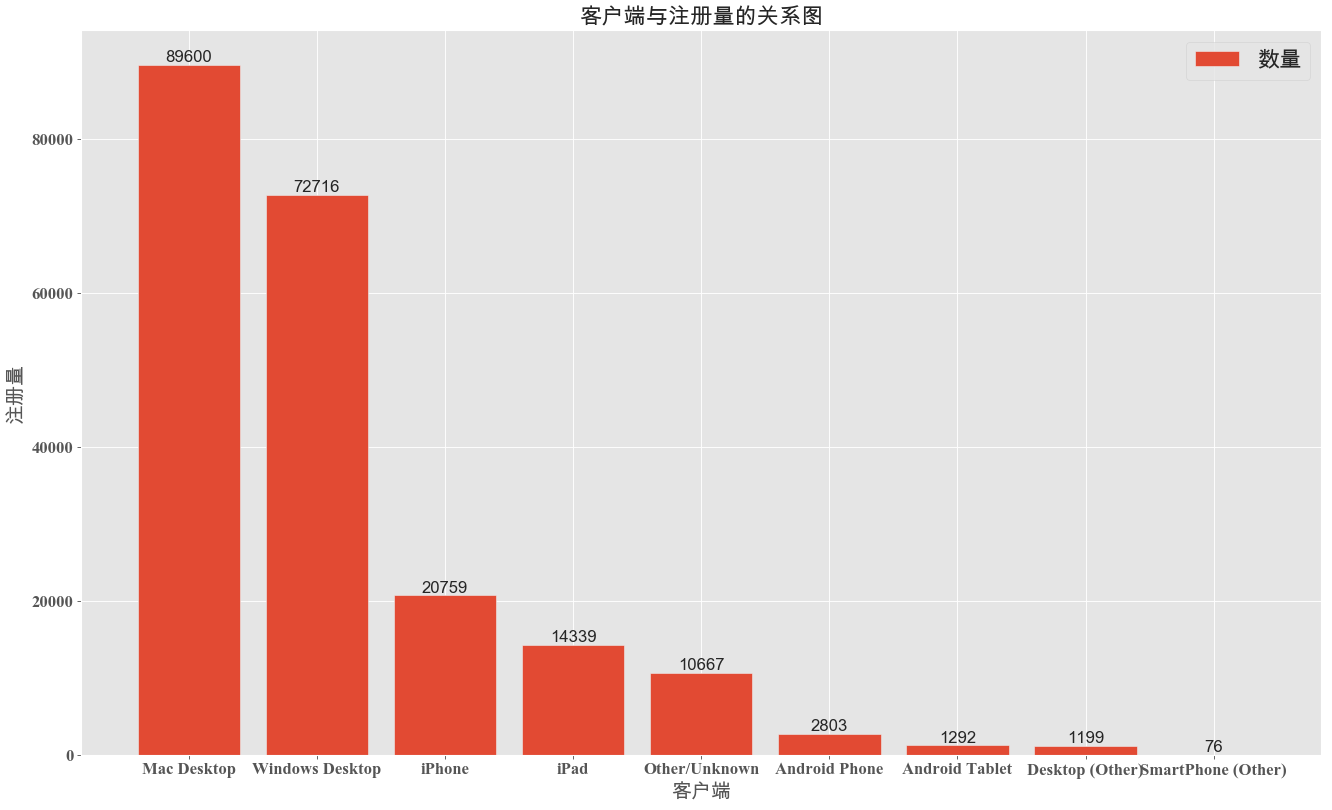

In [46]:
plt.figure(figsize=(20, 12), dpi=80)
x = df_train["first_device_type"].value_counts().index
y = df_train["first_device_type"].value_counts().values
p = plt.bar(x, y, label="数量")
for x,y in zip(x, y):
    plt.text(x,y, '%.0f'%y, ha='center',va='bottom',size =15)
plt.xlabel('客户端',size = 18)
plt.xticks(fontproperties = 'Times New Roman',size =15)
plt.ylabel('注册量',size = 18)
plt.yticks(fontproperties = 'Times New Roman', size = 15)
plt.title('客户端与注册量的关系图' ,size = 20)
plt.legend(loc="upper right",prop = {'size':20})
plt.show()

从结果可以看到：  
1. 58％的用户正在使用Apple产品，意味着Mac用户的预订频率更高
2. PC设备端用户注册数量约占总注册数量的79%，远大于移动端，因这是截至2014年的数据，推测是之前智能移动端的普及率还不高。

## 不同推广渠道转化率

In [117]:
df_train["affiliate_channel"].unique()

array(['direct', 'seo', 'other', 'sem-non-brand', 'content', 'sem-brand',
       'remarketing', 'api'], dtype=object)

In [118]:
df_train["affiliate_provider"].unique()

array(['direct', 'google', 'other', 'craigslist', 'facebook', 'vast',
       'bing', 'meetup', 'facebook-open-graph', 'email-marketing',
       'yahoo', 'padmapper', 'gsp', 'wayn', 'naver', 'baidu', 'yandex',
       'daum'], dtype=object)

In [119]:
df_transfer = df_train.groupby(["affiliate_channel","affiliate_provider"])["id","date_first_booking"].count()
df_transfer

id  date_first_booking
affiliate_channel affiliate_provider                             
api               other                  8167                2785
content           facebook                591                  68
                  google                 2892                 451
                  gsp                     453                  37
                  other                    11                   2
                  yandex                    1                   0
direct            direct               137426               59234
                  other                   301                 164
other             craigslist             3471                1616
                  email-marketing         166                  37
                  facebook-open-graph     545                 141
                  meetup                  347                  46
                  other                  3656                1508
                  padmapper               768                 252
                  wayn                      8                   0
remarketing       google                 1094                 368
                  yandex                    2                   0
sem-brand         baidu                     7                   5
                  bing                    950                 375
                  google                25069               10705
                  naver                     7                   3
                  other                     5                   3
                  yandex                    7                   3
sem-non-brand     baidu                    18                   5
                  bing                    889                 296
                  daum                      1                   1
                  facebook                  5                   0
                  google                16947                6516
                  naver                    45                  15
                  other                   103                  45
                  vast                    829                 271
                  yandex                    7                   1
seo               baidu                     4                   0
                  bing                    489                 162
                  facebook               1677                 724
                  google                 5691                2739
                  other                   306                 156
                  yahoo                   496                 174

In [120]:
df_transfer["转化率"] = df_transfer["date_first_booking"]/df_transfer["id"]*100
df_transfer

id  date_first_booking         转化率
affiliate_channel affiliate_provider                                         
api               other                  8167                2785   34.100649
content           facebook                591                  68   11.505922
                  google                 2892                 451   15.594744
                  gsp                     453                  37    8.167770
                  other                    11                   2   18.181818
                  yandex                    1                   0    0.000000
direct            direct               137426               59234   43.102470
                  other                   301                 164   54.485050
other             craigslist             3471                1616   46.557188
                  email-marketing         166                  37   22.289157
                  facebook-open-graph     545                 141   25.871560
                  meetup                  347                  46   13.256484
                  other                  3656                1508   41.247265
                  padmapper               768                 252   32.812500
                  wayn                      8                   0    0.000000
remarketing       google                 1094                 368   33.638026
                  yandex                    2                   0    0.000000
sem-brand         baidu                     7                   5   71.428571
                  bing                    950                 375   39.473684
                  google                25069               10705   42.702142
                  naver                     7                   3   42.857143
                  other                     5                   3   60.000000
                  yandex                    7                   3   42.857143
sem-non-brand     baidu                    18                   5   27.777778
                  bing                    889                 296   33.295838
                  daum                      1                   1  100.000000
                  facebook                  5                   0    0.000000
                  google                16947                6516   38.449283
                  naver                    45                  15   33.333333
                  other                   103                  45   43.689320
                  vast                    829                 271   32.689988
                  yandex                    7                   1   14.285714
seo               baidu                     4                   0    0.000000
                  bing                    489                 162   33.128834
                  facebook               1677                 724   43.172332
                  google                 5691                2739   48.128624
                  other                   306                 156   50.980392
                  yahoo                   496                 174   35.080645

In [121]:
df_transfer1 = df_transfer["id"]
df_transfer1

affiliate_channel  affiliate_provider 
api                other                    8167
content            facebook                  591
                   google                   2892
                   gsp                       453
                   other                      11
                   yandex                      1
direct             direct                 137426
                   other                     301
other              craigslist               3471
                   email-marketing           166
                   facebook-open-graph       545
                   meetup                    347
                   other                    3656
                   padmapper                 768
                   wayn                        8
remarketing        google                   1094
                   yandex                      2
sem-brand          baidu                       7
                   bing                      950
                   google     

In [122]:
df_transfer2 = df_transfer["转化率"]
df_transfer2

affiliate_channel  affiliate_provider 
api                other                   34.100649
content            facebook                11.505922
                   google                  15.594744
                   gsp                      8.167770
                   other                   18.181818
                   yandex                   0.000000
direct             direct                  43.102470
                   other                   54.485050
other              craigslist              46.557188
                   email-marketing         22.289157
                   facebook-open-graph     25.871560
                   meetup                  13.256484
                   other                   41.247265
                   padmapper               32.812500
                   wayn                     0.000000
remarketing        google                  33.638026
                   yandex                   0.000000
sem-brand          baidu                   71.428571
       

In [123]:
df_transfer1 = df_transfer1.unstack()
df_transfer1

affiliate_provider,baidu,bing,craigslist,daum,direct,email-marketing,facebook,facebook-open-graph,google,gsp,meetup,naver,other,padmapper,vast,wayn,yahoo,yandex
affiliate_channel,,,,,,,,,,,,,,,,,,
api,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8167.0,NaN,NaN,NaN,NaN,NaN
content,NaN,NaN,NaN,NaN,NaN,NaN,591.0,NaN,2892.0,453.0,NaN,NaN,11.0,NaN,NaN,NaN,NaN,1.0
direct,NaN,NaN,NaN,NaN,137426.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301.0,NaN,NaN,NaN,NaN,NaN
other,NaN,NaN,3471.0,NaN,NaN,166.0,NaN,545.0,NaN,NaN,347.0,NaN,3656.0,768.0,NaN,8.0,NaN,NaN
remarketing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1094.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
sem-brand,7.0,950.0,NaN,NaN,NaN,NaN,NaN,NaN,25069.0,NaN,NaN,7.0,5.0,NaN,NaN,NaN,NaN,7.0
sem-non-brand,18.0,889.0,NaN,1.0,NaN,NaN,5.0,NaN,16947.0,NaN,NaN,45.0,103.0,NaN,829.0,NaN,NaN,7.0
seo,4.0,489.0,NaN,NaN,NaN,NaN,1677.0,NaN,5691.0,NaN,NaN,NaN,306.0,NaN,NaN,NaN,496.0,NaN


In [124]:
df_transfer2 = df_transfer2.unstack()
df_transfer2

affiliate_provider,baidu,bing,craigslist,daum,direct,email-marketing,facebook,facebook-open-graph,google,gsp,meetup,naver,other,padmapper,vast,wayn,yahoo,yandex
affiliate_channel,,,,,,,,,,,,,,,,,,
api,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.100649,NaN,NaN,NaN,NaN,NaN
content,NaN,NaN,NaN,NaN,NaN,NaN,11.505922,NaN,15.594744,8.16777,NaN,NaN,18.181818,NaN,NaN,NaN,NaN,0.000000
direct,NaN,NaN,NaN,NaN,43.10247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.485050,NaN,NaN,NaN,NaN,NaN
other,NaN,NaN,46.557188,NaN,NaN,22.289157,NaN,25.87156,NaN,NaN,13.256484,NaN,41.247265,32.8125,NaN,0.0,NaN,NaN
remarketing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.638026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
sem-brand,71.428571,39.473684,NaN,NaN,NaN,NaN,NaN,NaN,42.702142,NaN,NaN,42.857143,60.000000,NaN,NaN,NaN,NaN,42.857143
sem-non-brand,27.777778,33.295838,NaN,100.0,NaN,NaN,0.000000,NaN,38.449283,NaN,NaN,33.333333,43.689320,NaN,32.689988,NaN,NaN,14.285714
seo,0.000000,33.128834,NaN,NaN,NaN,NaN,43.172332,NaN,48.128624,NaN,NaN,NaN,50.980392,NaN,NaN,NaN,35.080645,NaN


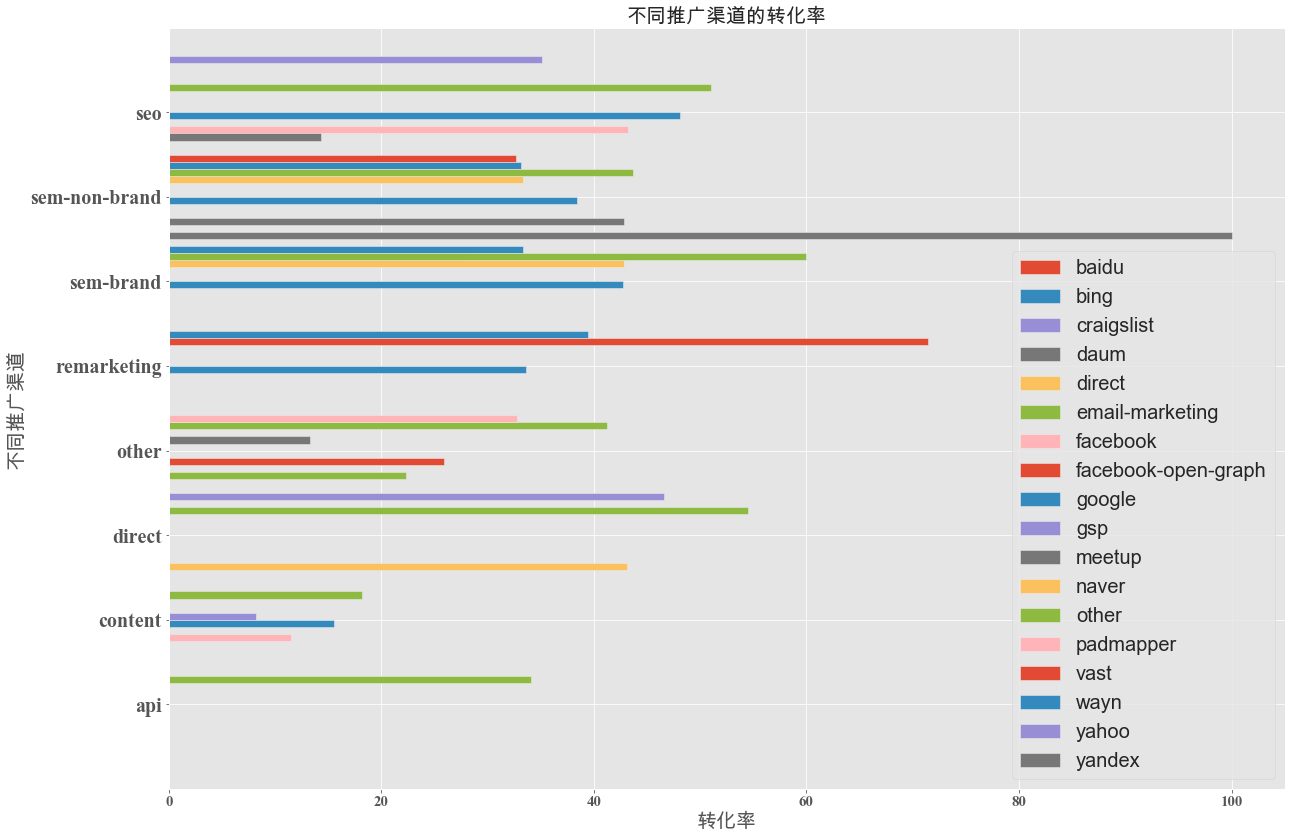

In [141]:
(df_transfer2).plot(kind = 'barh',width = 1.5,figsize=(20, 14))
plt.xticks(fontproperties = 'Times New Roman',size = 15)
plt.xlabel('转化率', size = 20)
plt.yticks(fontproperties = 'Times New Roman', size = 20)
plt.ylabel('不同推广渠道', size = 20)
plt.title('不同推广渠道的转化率', size = 20)
plt.legend(loc="lower right",prop = {'size':20})
plt.show()

渠道转化率方面：  

1. 大部分渠道转化率都是在30%以上，表现比较健康。  
2. 从营销方式来看，content（内容营销）方式转化率较其他方式少。   
3. 从营销来源来看，主要营销来源（Google）中，除了content方式，其他方式的转化率都比较健康。

# 转化漏斗分析

## 有行为状态的用户总数量

In [142]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [175]:
sessions_user_id_set = set(sessions.user_id)
len(sessions_user_id_set)

135484

可以看到，有行为状态的用户数为135484

## 行为活跃的用户数量

此处定义用户行为超过十次即为活跃用户，可针对字段user_id分析，若id出现次数超过十次，则为活跃用户。

In [166]:
active_users = sessions.groupby("user_id").filter(lambda x: (len(x) > 10))

In [167]:
active_users

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [170]:
active_users_set = set(active_users["user_id"])
active_users_set

{'9l01q8l13q',
 'zuy9xqj2a1',
 'hix50y9q52',
 '224s8e5ho2',
 'n9w6o54k00',
 '9e5qum4w5i',
 'yp1ypig2zf',
 '9sh3vcqncy',
 'ge90cf3ci1',
 'o2jkpfx4n3',
 'cufnmz6x9s',
 'an0ghhboyw',
 'ypiit58gxe',
 'xng38uu0sn',
 'n15fr4xzo2',
 'k7d9vtu7nu',
 '3t1rro1vwg',
 'xevvjcq4t1',
 'k9maa1prc2',
 '7qmub5jpcq',
 'c0vllrmnet',
 '4ah0emf8fi',
 'rjp0igbooz',
 '4rguz0qouz',
 'gi83pso3z3',
 '8upph9v6yh',
 'apm711dhef',
 'n63tozjpdh',
 'covrux8cu6',
 'qz7fu541k6',
 'nk50vfhwxk',
 'liqtiuntj7',
 'b2wnnujcw1',
 '139shng66w',
 'otz8fdpqt5',
 'fep5zn1qdp',
 'oug43g0kiw',
 'nctvr5nhtc',
 'l3xdj8bvcx',
 'kbdexfb18o',
 '62zzn2q5g8',
 'dvies9nd9y',
 '2orlwpttol',
 'a31omyu3uh',
 'm7lg80kybm',
 'ozuc1ohlgr',
 '4f0r4vqsvr',
 '8skegylvov',
 '0ahzg57dxd',
 '2sv0w02fsp',
 'wqoau4yrc9',
 'ustyy5bnit',
 'gtaw73ns6o',
 'qon57i4zqu',
 'a7z7v107dh',
 '4nw5yi8b44',
 '2lsddunloj',
 'w2mxpqt1b4',
 '5hbkuc6c8h',
 'yb8271vs68',
 'u45ql77ek6',
 'f3p0zmlkvg',
 '9y7f17h88r',
 'ypr8we9byz',
 '6r4zpmu0ij',
 'xgg68dos8b',
 'z7rt9gbk

In [173]:
len(active_users_set)

111977

可以看到，活跃的用户数为111977

## 此段时间内用户的下单用户量

In [191]:
len(set(sessions[sessions["action_detail"]=="reservations"]["user_id"]))

10367

可以看到，此段时间内用户的下单用户量为10367

## 下单后实际支付的用户数量

需要对action_detail进行分析，其中“payment_instruments”为支付操作

In [193]:
len(set(sessions[sessions["action_detail"]=="payment_instruments"]["user_id"]))

9019

可以看到，下单后实际支付的用户数量为9019

## 复购用户数量

需要统计进行了“payment_instruments”操作次数大于1次的用户

In [206]:
payed_users = sessions[sessions["action_detail"]=="payment_instruments"]["user_id"].value_counts()
payed_users

8darcu0vnw    68
s9fbnz4i8i    63
e8h4qghxlg    55
q4y5ahu6vt    54
87me3z4l9u    48
hnnemulw0a    45
51gxyckww4    45
odhne18hum    42
ejpe95pcyo    38
5nz64fz8lf    38
xcjqww3bnz    38
56ij89u793    38
ju7k8x2p3i    35
dftje3rzea    35
lwcq4u850n    34
r3l31vp1ni    33
0x9u9iibrv    33
a0w8tzodgl    32
cjvz4q1hi6    31
vdrm13qy73    31
s2vg1tq7sd    30
hp5urn796c    30
magimtd42r    30
cliko7bn3c    29
xirsjmv9cv    29
p52o15w2yp    29
vps7vahqst    29
7xzjpyu3ly    28
3zzk60xau3    28
muuas726n3    28
              ..
ne7t9rizu6     1
ljslyq8ktr     1
zhoo1yhp91     1
vrr59h2eli     1
625msp0nyo     1
g18ybkqtxc     1
swf0rakros     1
xq01zxu690     1
onqr95928e     1
89pczh8x61     1
b53rqcyw7l     1
qa5a15r10k     1
6rd3equ5bz     1
k3g0exzyc2     1
uj5qojjxjc     1
ign09jc7z3     1
91cp6rbi2i     1
u8qohubr5c     1
jhan06ramb     1
nyin3rgmfi     1
ri7hnih5vn     1
8inf93jaax     1
9choamchcy     1
m9s9idkjv0     1
sx8upmpcym     1
er4jnkhdo8     1
wtnck4t22d     1
k93ptff1d4    

In [209]:
len(payed_users[payed_users.values>2])

2450

可以看到，复购用户数量为2450

## 绘制漏斗图

In [259]:
from pyecharts import Funnel

attr = ['用户总量','活跃用户数','下单用户数','实际支付用户数','复购用户数']
values = [135484,111977,10367,9019,2450]

funnel = Funnel("漏斗图", width=600, height=400, title_pos='center')
funnel.add("商品交易行为记录数据", 
           attr = attr, 
           value = values, 
           is_label_show=True,
           label_formatter= '{c}%',
           label_pos="outside",
           legend_top='bottom',    # 指定图例位置，为避免遮盖选择右下展示
           legend_orient='vertical', 
           legend_pos='left')

funnel.render("商品交易行为记录数据.html")

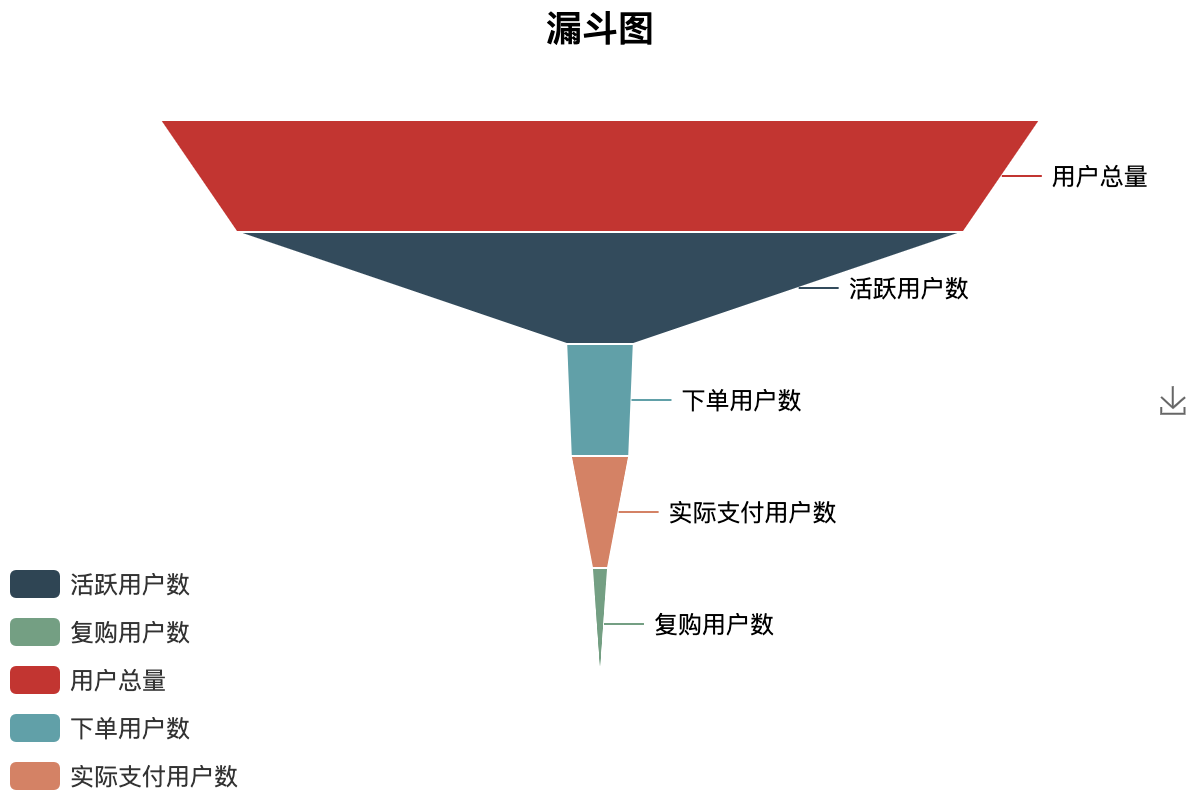

根据结果可以看到：

1. 活跃用户中仅有9.26%的用户下单，sessions数据时间段为2014-01-01到2014-06-30，推测原因为此时间段为旅游淡季导致下单用户很少。
2. 下单用户中最终支付的为87.0%，需要分析是什么原因导致用户取消订单。